In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import os
from keras.applications.vgg19 import VGG19
import keras
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [2]:
# Setting up the dataset directory and file paths
traindir = '../project/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
testdir = '../project/test/'
validdir = '../project/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'


Horizontal flips with rotation angle of 45 degrees and different zoom ranges


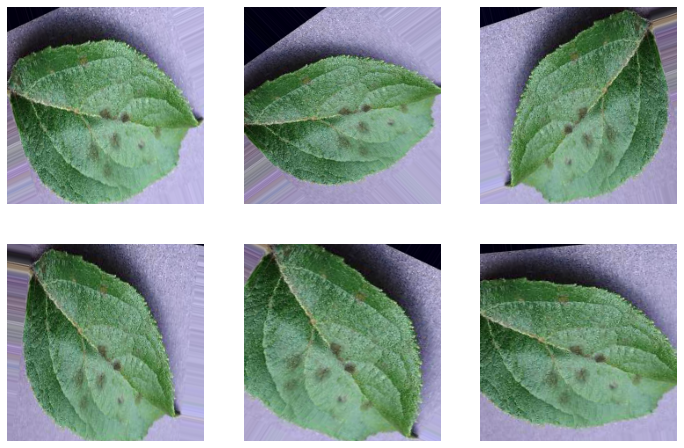

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

img_path = "../project/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/2bc018ba-3c49-4cf4-9411-a93b7b196f45___FREC_Scab 3326_90deg.JPG"

print("Horizontal flips with rotation angle of 45 degrees and different zoom ranges")
# Create an image data generator with horizontal flip and zoom range augmentation
datagen = ImageDataGenerator(horizontal_flip=True,rotation_range=45, zoom_range=[0.8, 1.2])

# Load the image and reshape it to (1, height, width, channels)
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# Generate augmented images and display them
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()

for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    axs[i].imshow(array_to_img(batch[0]))
    axs[i].axis("off")
    if i == 5:
        break

plt.show()





In [4]:
img_height = 224
img_width = 224
batch_size = 32

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(traindir,
                                                 target_size=(img_height,img_width),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(validdir,
                                            target_size=(img_height,img_width),
                                            batch_size=batch_size,
                                            class_mode='categorical')


Found 70452 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [6]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [7]:
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [8]:
len(li)

38

In [9]:
from glob import glob
filepaths = list(glob('../project/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'+'/*/*.*'))

In [10]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(15)

,Filepath,Label
0,../project/new plant diseases dataset(augmente...,Potato___Early_blight
1,../project/new plant diseases dataset(augmente...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
2,../project/new plant diseases dataset(augmente...,Peach___Bacterial_spot
3,../project/new plant diseases dataset(augmente...,Tomato___Target_Spot
4,../project/new plant diseases dataset(augmente...,Tomato___Spider_mites Two-spotted_spider_mite
5,../project/new plant diseases dataset(augmente...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
6,../project/new plant diseases dataset(augmente...,Soybean___healthy
7,../project/new plant diseases dataset(augmente...,Strawberry___healthy
8,../project/new plant diseases dataset(augmente...,Grape___Black_rot
9,../project/new plant diseases dataset(augmente...,Tomato___Bacterial_spot


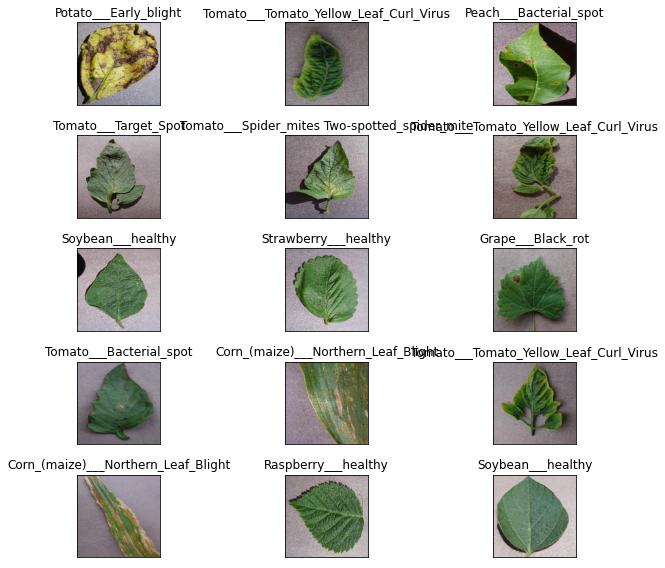

In [11]:
fig, axes = plt.subplots(nrows=5, 
                         ncols=3, 
                         figsize=(10,8), 
                         subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

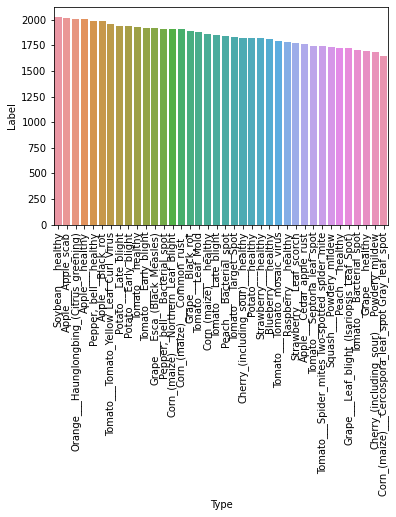

In [12]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [13]:
t_img , label=training_set.next()

In [14]:
t_img.shape

(32, 224, 224, 3)

In [15]:
def plotImage(img_arr,label):
    for im,l in zip(img_arr,label):
        plt.figure(figsize=(5,5))
        plt.imshow(im)
        plt.show()

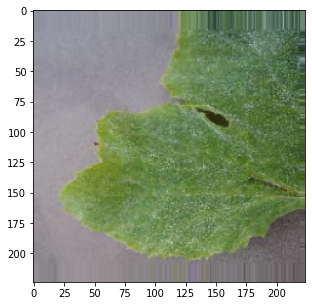

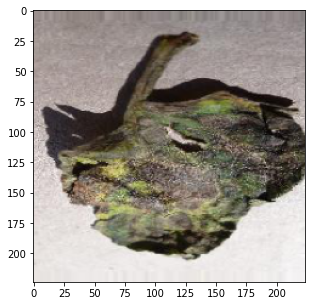

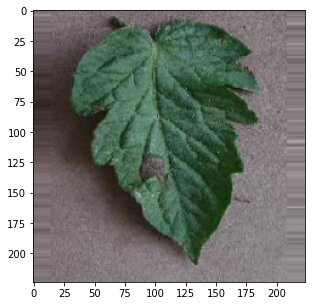

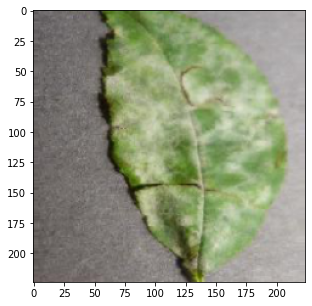

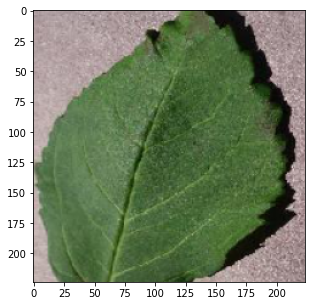

In [16]:
plotImage(t_img[:5],label[:5])

In [17]:
train_num = training_set.samples
valid_num = valid_set.samples

In [18]:
# build CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(38, activation='softmax'))

# compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(training_set, 
          steps_per_epoch=train_num//batch_size, 
          epochs=5, 
          validation_data=valid_set, 
          validation_steps=valid_num//batch_size)


Epoch 1/5
2201/2201 [==============================] - 1978s 898ms/step - loss: 0.9315 - accuracy: 0.7203 - val_loss: 0.6393 - val_accuracy: 0.8130
Epoch 2/5
2201/2201 [==============================] - 2325s 1s/step - loss: 0.3182 - accuracy: 0.8958 - val_loss: 0.3703 - val_accuracy: 0.8830
Epoch 3/5
2201/2201 [==============================] - 2334s 1s/step - loss: 0.2260 - accuracy: 0.9260 - val_loss: 0.2213 - val_accuracy: 0.9294
Epoch 4/5
2201/2201 [==============================] - 2309s 1s/step - loss: 0.1785 - accuracy: 0.9419 - val_loss: 0.1838 - val_accuracy: 0.9403
Epoch 5/5
2201/2201 [==============================] - 2323s 1s/step - loss: 0.1443 - accuracy: 0.9523 - val_loss: 0.2900 - val_accuracy: 0.9191


In [20]:
filepath="../project/cnn_plant_model.h5"
model.save(filepath)

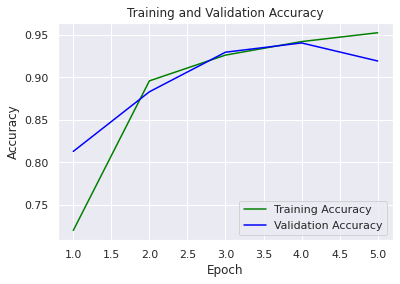

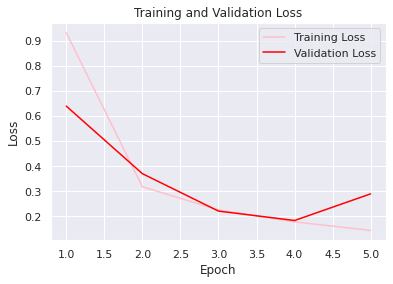

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
from keras.models import load_model
model = load_model("../project/cnn_plant_model.h5")
acc = model.evaluate_generator(valid_set)[1]
print(f"The accuracy = {acc*100}%")

/home/cseb17/.local/lib/python3.6/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


The accuracy = 91.90757870674133%


In [23]:
from keras.models import load_model
model = load_model("../project/cnn_plant_model.h5")
acc = model.evaluate_generator(training_set)[1]
print(f"The accuracy = {acc*100}%")

The accuracy = 95.0264036655426%


In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(testdir, 
                                                  target_size=(224, 224), 
                                                  batch_size=32, 
                                                  class_mode='categorical', 
                                                  shuffle=False)

Found 49 images belonging to 3 classes.


In [25]:
# predict classes of test data
y_true = valid_set.classes
y_pred = model.predict(valid_set)
y_pred_classes = np.argmax(y_pred, axis=1)


In [26]:
# print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
class_labels = list(valid_set.class_indices.keys())
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_labels))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))

Classification Report:
                                                     precision    recall  f1-score   support

                                Apple___Apple_scab       0.03      0.03      0.03       504
                                 Apple___Black_rot       0.02      0.02      0.02       497
                          Apple___Cedar_apple_rust       0.02      0.02      0.02       440
                                   Apple___healthy       0.03      0.04      0.03       502
                               Blueberry___healthy       0.04      0.04      0.04       454
          Cherry_(including_sour)___Powdery_mildew       0.03      0.03      0.03       421
                 Cherry_(including_sour)___healthy       0.03      0.04      0.03       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.02      0.02      0.02       410
                       Corn_(maize)___Common_rust_       0.01      0.01      0.01       477
               Corn_(maize)___Northern_Leaf_Blight     